In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import os
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import math
from copy import deepcopy

import pandas as pd

In [10]:
class DrowsinessData(Dataset):
    def __init__(self,data, trn_val_tst, transform=None):

        # split_idx1 = int(data.shape[0]*0.6)
        # split_idx2 = int(data.shape[0]*0.8)
        # if trn_val_tst == 0:
        #     #trainloader
        #     self.X = data.iloc[0:split_idx1, 0:-1].to_numpy()
        #     self.labels = data.iloc[0:split_idx1, -1].to_numpy()
        # elif trn_val_tst == 1:
        #     #valloader
        #     self.X = data.iloc[split_idx1:split_idx2, 0:-1].to_numpy()
        #     self.labels = data.iloc[split_idx1:split_idx2, -1].to_numpy()
        # else:
        #     #testloader
        #     self.X = data.iloc[split_idx1:split_idx2, 0:-1].to_numpy()
        #     self.labels = data.iloc[split_idx1:split_idx2, -1].to_numpy()

        self.X = data.iloc[:, 0:-1].to_numpy()
        self.labels = data.iloc[:, -1].to_numpy()

        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample = self.X[idx,:]
        label = self.labels[idx]

        # if self.transform:
        #     sample = self.transform(sample)
        sample = torch.from_numpy(sample).type(torch.float32)
        label = torch.tensor(label, dtype=torch.float32).unsqueeze(0)

        return sample, label

In [11]:
test_data = pd.read_csv("../Features_and_Labels/30s/test_features_and_labels_30s.csv")


filter_features = {
    "mrmr": {
        "15": ['MDF', 'bandPower(){}_2_beta', 'bandPower(){}_1_beta', 'MNF', 'csi', 'Sp_ent2', 'pnni_50', 'ZC', 'PKF', 'sampEn(){}_2', 'bandPower(){}_2_alpha', 'LZC(){}_1', 'Sp_ent1', 
                   'nni_50', 'fuzzy0', 'kss'],
        "30": ['MDF', 'bandPower(){}_2_beta', 'bandPower(){}_1_beta', 'MNF', 'csi', 'Sp_ent2', 'pnni_50', 'ZC', 'PKF', 'sampEn(){}_2', 'bandPower(){}_2_alpha', 'LZC(){}_1', 'Sp_ent1', 
                   'nni_50', 'fuzzy0', 'blinking_rate', 'Sp_ent0', 'DFA(){}_2', 'WENT', 'bandPower(){}_1_alpha', 'lf_hf_ratio', 'hjorthMobility(){}_1', 'pnni_20', 'bandPower(){}_2_theta', 
                   'WL', 'ACC', 'hjorthComplexity(){}_2', 'PFD(){}_1', 'lfnu', 'PFD(){}_2', 'kss'],
        "45": ['MDF', 'bandPower(){}_2_beta', 'bandPower(){}_1_beta', 'MNF', 'csi', 'Sp_ent2', 'pnni_50', 'ZC', 'PKF', 'sampEn(){}_2', 'bandPower(){}_2_alpha', 'LZC(){}_1', 'Sp_ent1', 
                   'nni_50', 'fuzzy0', 'blinking_rate', 'Sp_ent0', 'DFA(){}_2', 'WENT', 'bandPower(){}_1_alpha', 'lf_hf_ratio', 'hjorthMobility(){}_1', 'pnni_20', 'bandPower(){}_2_theta', 
                   'WL', 'ACC', 'hjorthComplexity(){}_2', 'PFD(){}_1', 'lfnu', 'PFD(){}_2', 'nni_20', 'hjorthMobility(){}_2', 'HFD(){}_2', 'LZC(){}_2', 'DFA(){}_1', 'LZC(){}_0', 'EEG_std2', 
                   'range_nni', 'hjorthComplexity(){}_1', 'wave_ent0', 'mean_hr', 'fuzzy2', 'wave_ent2', 'LOG', 'ApEnt0', 'kss'],
        "60": ['MDF', 'bandPower(){}_2_beta', 'bandPower(){}_1_beta', 'MNF', 'csi', 'Sp_ent2', 'pnni_50', 'ZC', 'PKF', 'sampEn(){}_2', 'bandPower(){}_2_alpha', 'LZC(){}_1', 'Sp_ent1', 
                'nni_50', 'fuzzy0', 'blinking_rate', 'Sp_ent0', 'DFA(){}_2', 'WENT', 'bandPower(){}_1_alpha', 'lf_hf_ratio', 'hjorthMobility(){}_1', 'pnni_20', 'bandPower(){}_2_theta', 
                'WL', 'ACC', 'hjorthComplexity(){}_2', 'PFD(){}_1', 'lfnu', 'PFD(){}_2', 'nni_20', 'hjorthMobility(){}_2', 'HFD(){}_2', 'LZC(){}_2', 'DFA(){}_1', 'LZC(){}_0', 'EEG_std2', 
                'range_nni', 'hjorthComplexity(){}_1', 'wave_ent0', 'mean_hr', 'fuzzy2', 'wave_ent2', 'LOG', 'ApEnt0', 'min_hr', 'bandPower(){}_2_delta', 'MOE_mean', 'MYOP', 'vlf', 
                'Multiscale1', 'WAMP', 'Sh_Ent2', 'SaEnt0', 'cvsd', 'EEG_kurt2', 'EEG_skew1', 'bandPower(){}_0_theta', 'MAR_mean', 'bandPower(){}_0_alpha', 'kss']
    },
    "kbest": {
        "15": ['bandPower(){}_1_alpha', 'bandPower(){}_1_beta', 'bandPower(){}_2_alpha', 'bandPower(){}_2_beta', 'LZC(){}_1', 'fuzzy0', 'Sp_ent0', 'Sp_ent1', 'Sp_ent2', 'nni_50', 'ZC', 
                   'MNF', 'MDF', 'PKF', 'WENT', 'kss'],
        "30": ['bandPower(){}_1_alpha', 'bandPower(){}_1_beta', 'bandPower(){}_2_theta', 'bandPower(){}_2_alpha', 'bandPower(){}_2_beta', 'hjorthMobility(){}_1', 'hjorthMobility(){}_2', 
                   'hjorthComplexity(){}_2', 'sampEn(){}_2', 'DFA(){}_2', 'PFD(){}_1', 'PFD(){}_2', 'LZC(){}_1', 'LZC(){}_2', 'fuzzy0', 'Sp_ent0', 'Sp_ent1', 'Sp_ent2', 'nni_50', 'pnni_20', 
                   'pnni_50', 'csi', 'WL', 'ACC', 'ZC', 'MNF', 'MDF', 'PKF', 'WENT', 'blinking_rate', 'kss'],
        "45": ['bandPower(){}_1_alpha', 'bandPower(){}_1_beta', 'bandPower(){}_2_theta', 'bandPower(){}_2_alpha', 'bandPower(){}_2_beta', 'hjorthMobility(){}_1', 'hjorthMobility(){}_2', 
                   'hjorthComplexity(){}_1', 'hjorthComplexity(){}_2', 'sampEn(){}_2', 'DFA(){}_1', 'DFA(){}_2', 'PFD(){}_1', 'PFD(){}_2', 'LZC(){}_0', 'LZC(){}_1', 'LZC(){}_2', 'HFD(){}_2', 
                   'ApEnt0', 'SaEnt0', 'fuzzy0', 'Sp_ent0', 'wave_ent0', 'Sp_ent1', 'fuzzy2', 'Sp_ent2', 'wave_ent2', 'EEG_std2', 'nni_20', 'nni_50', 'pnni_20', 'pnni_50', 'range_nni', 
                   'lf_hf_ratio', 'lfnu', 'csi', 'LOG', 'WL', 'ACC', 'ZC', 'MNF', 'MDF', 'PKF', 'WENT', 'blinking_rate', 'kss'],
        "60": ['bandPower(){}_0_theta', 'bandPower(){}_0_alpha', 'bandPower(){}_1_alpha', 'bandPower(){}_1_beta', 'bandPower(){}_2_delta', 'bandPower(){}_2_theta', 'bandPower(){}_2_alpha', 
                'bandPower(){}_2_beta', 'hjorthMobility(){}_1', 'hjorthMobility(){}_2', 'hjorthComplexity(){}_1', 'hjorthComplexity(){}_2', 'sampEn(){}_1', 'sampEn(){}_2', 'DFA(){}_1', 
                'DFA(){}_2', 'PFD(){}_1', 'PFD(){}_2', 'LZC(){}_0', 'LZC(){}_1', 'LZC(){}_2', 'HFD(){}_2', 'ApEnt0', 'SaEnt0', 'fuzzy0', 'Sp_ent0', 'wave_ent0', 'Multiscale1', 'Sp_ent1', 
                'fuzzy2', 'Sp_ent2', 'wave_ent2', 'EEG_std2', 'cvsd', 'mean_hr', 'median_nni', 'min_hr', 'nni_20', 'nni_50', 'pnni_20', 'pnni_50', 'range_nni', 'lf_hf_ratio', 'lfnu', 'vlf', 
                'csi', 'RMS', 'IEMG', 'MAV', 'LOG', 'WL', 'ACC', 'ZC', 'WAMP', 'MYOP', 'MNF', 'MDF', 'PKF', 'WENT', 'blinking_rate', 'kss']
    }
}

ttest_features = ["bandPower(){}_0_theta", "bandPower(){}_0_alpha", "bandPower(){}_0_beta",	"bandPower(){}_1_delta", "bandPower(){}_2_alpha", "bandPower(){}_2_beta", 
                  "hjorthActivity(){}_1", "hjorthActivity(){}_2", "hjorthMobility(){}_0", "hjorthMobility(){}_2", "hjorthComplexity(){}_0",	"hjorthComplexity(){}_2", "sampEn(){}_2", 
                  "DFA(){}_0", "DFA(){}_2", "PFD(){}_2", "LZC(){}_0", "LZC(){}_1",	"LZC(){}_2", "fuzzy0", "Sp_ent0", "EEG_kurt0",	"Sp_ent1",	"wave_ent1", "EEG_kurt1", "Multiscale2", 
                  "Sp_ent2", "wave_ent2", "EEG_mean2", "EEG_kurt2", "cvnni",	"max_hr", "nni_20",	"nni_50", "pnni_20", "pnni_50",	"range_nni", "fuzzy",	"sdsd",	"std_hr", "lf",	"hf", 
                  "lf_hf_ratio", "lfnu", "total_power",	"vlf",	"csi",	"RMS", "IEMG",	"MAV",	"LOG",	"ZC", "WAMP", "MNF", "MDF",	"PKF", "WENT", "blinking_rate",	"MAR_mean",	"vtilt_mean", 
                  "htilt_std", "kss"]

test_data = test_data.loc[:, filter_features["mrmr"]["30"]]

print(test_data.shape)

test_set = DrowsinessData(test_data, trn_val_tst=2)

batch_size = 100 

testloader =  DataLoader(test_set, batch_size=batch_size, shuffle=False)

num_features = test_set.X.shape[1]

(697, 31)


In [12]:
class DrowsyNet(nn.Module):
    def __init__(self, channels_in):
        # calling the init function of the parent nn.Module
        super(DrowsyNet, self).__init__()
        
        # defining the fully connected layers
        print(channels_in)
        self.fc1 = nn.Linear(int(channels_in), int(channels_in//1.5))
        self.fc2 = nn.Linear(int(channels_in//1.5), int(channels_in//3))
        self.fc3 = nn.Linear(int(channels_in//3), 1)
        
    def forward(self, x):
        # Passing it through fc layers
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [13]:
#This function should perform a single evaluation epoch, it WILL NOT be used to train our model
def evaluate(model, device, loader, loss_fun):
    #initialise counter
    total_loss = 0
    
    #Set network in evaluation mode
    #Layers like Dropout will be disabled
    #Layers like Batchnorm will stop calculating running mean and standard deviation
    #and use current stored values
    #(More on these layer types soon!)
    model.eval()
    
    with torch.no_grad():
        for i, (x, y) in enumerate(loader):
            #Forward pass of image through network
            fx = model(x.to(device))
            y = y.type(torch.FloatTensor)
            
            #calculate the loss
            loss = loss_fun(fx, y.to(device))
            total_loss += loss.item()
    
    #return the accuracy from the epoch     
    return total_loss

In [14]:
def get_acc(model, device, loader):
    total_loss = 0
    total_count = 0
    correct_count = 0
    #Set network in evaluation mode
    #Layers like Dropout will be disabled
    #Layers like Batchnorm will stop calculating running mean and standard deviation
    #and use current stored values
    #(More on these layer types soon!)
    model.eval()
    
    with torch.no_grad():
        for i, (x, y) in enumerate(loader):
            #Forward pass of image through network
            fx = model(x.to(device)).squeeze(1).cpu().numpy().tolist()
            y = y.type(torch.FloatTensor).squeeze(1).cpu().numpy().tolist()
            
            for k in range(len(y)):
                total_count += 1
                if (fx[k] >= 6.5 and y[k] >= 6.5) or (fx[k] <6.5 and y[k] <6.5):
                    correct_count += 1
    
    #return the accuracy from the epoch     
    return correct_count/total_count

In [15]:
GPU_indx = 0
device = torch.device(GPU_indx if torch.cuda.is_available() else 'cpu')
model = DrowsyNet(num_features).to(device)
loss_fun = nn.MSELoss()

model.load_state_dict(torch.load("D:/School/Drowsiness-Detection-FYP/neural_network/regression/mrmr_30.pt"))

test_loss = evaluate(model, device, testloader, loss_fun)
test_acc = get_acc(model, device, testloader)

print(test_loss, np.sqrt(test_loss), test_acc)


30
34.573944091796875 5.879961232167851 0.6843615494978479


[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.045977, 2.091954, 2.137931, 2.183908, 2.229885, 2.275862, 2.321839, 2.3678162, 2.413793, 2.4597702, 2.505747, 2.5517242, 2.597701, 2.6436782, 2.689655, 2.7356322, 2.7816093, 2.8275862, 2.8735633, 2.9195402, 2.9655173, 3.0114942, 3.0574713, 3.1034484, 3.1494253, 3.1954024, 3.2413793, 3.2873564, 3.3333333, 3.3793104, 3.4252872, 3.4712644, 3.5172415, 3.5632184, 3.6091955, 3.6551723, 3.7011495, 3.7471263, 3.7931035, 3.8390806, 3.8850574, 3.9310346, 3.9770114, 4.0229883, 4.0689654, 4.1149426, 4.1609197, 4.206897, 4.2528734, 4.2988505, 4.3448277, 4.390

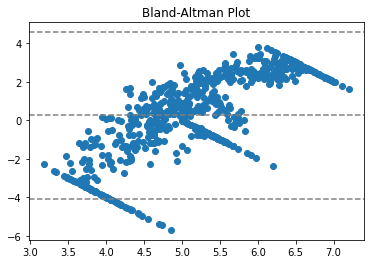

In [16]:

testloader =  DataLoader(test_set, batch_size=1, shuffle=False)
labels = []
preds = []
tp = 0
fp = 0
fn = 0
tn = 0
for i, (x, y) in enumerate(testloader):
    #Forward pass of image through network
    fx = model(x.to(device))
    labels.append(y.numpy()[0][0])
    preds.append(fx.cpu().detach().numpy()[0][0])
    for k in range(len(y)):
        if (fx[k] >= 6.5 and y[k] >= 6.5):
            tp += 1
        elif (fx[k] <6.5 and y[k] <6.5):
            tn += 1
        elif (fx[k] >= 6.5 and y[k] < 6.5):
            fp += 1
        elif (fx[k] < 6.5 and y[k] >= 6.5):
            fn += 1
    

print(labels)
print(preds)


def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

bland_altman_plot(labels, preds)
plt.title('Bland-Altman Plot')
plt.show()

In [17]:
print(tp, fp)
print(fn, tn)

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print(precision, recall)

0 15
205 477
0.0 0.0
